In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Visualization wrt different t

In [172]:
def plot_p0(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    
    
    fig, axs = plt.subplots(len(res), 1, figsize = (8,12))
    for i, t in enumerate(res):
        data = {}
        for p in prob:
            # load data
            temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
            # on each realization check for which nodes the property is realized
            temp2 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level == 0))
            data[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean() 
            del temp, temp2
        
        # plot data
        axs[i].set_title('Phase transition for t = {}'.format(t), fontsize=15)
        _ = axs[i].plot(list(data.keys()), list(data.values()), 'o-', color='darkorange')
        _ = axs[i].set_xlim(xmax=0.2)
        _ = axs[i].set_xlabel('probability')

        # delete from memory
        del data

    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/p0_{}_{}_{}.jpeg'.format(thr, lab, n))

Used probabilities: [0.0001, 0.0005, 0.002969251759660712, 0.004938503519321424, 0.009, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [2e-05, 0.0001, 0.0007011462127610826, 0.001202292425522165, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [1e-05, 5e-05, 0.00037367801239920613, 0.0006473560247984122, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]


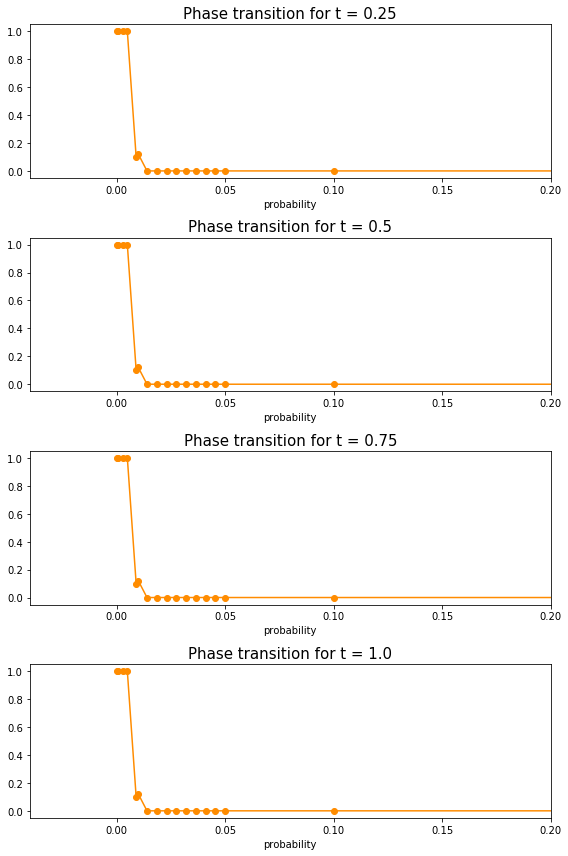

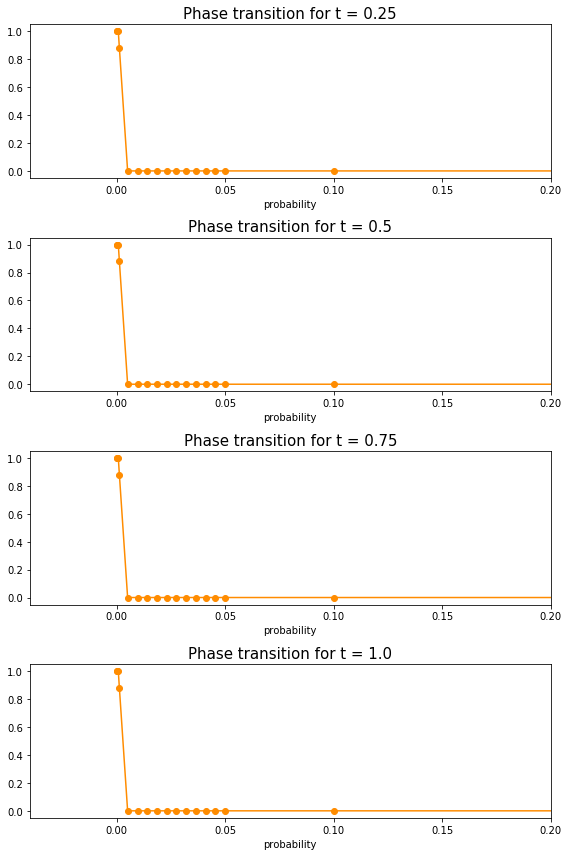

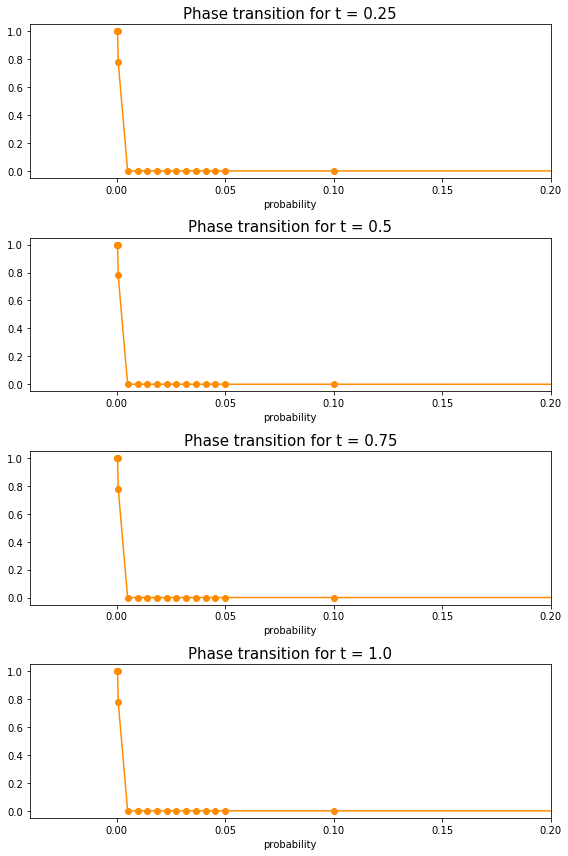

In [173]:
# graph size
N = 1000
# directed
d = True
# type: {True : maxpred, False: pred}
t = True 

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    with open('data/keys_ref.txt', 'r') as f:
        prob2 = eval(f.read())
    prob.extend(prob2)
    prob.sort()
    print('Used probabilities:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_p0(prob, d, N, res, t)

## Visualizations of the approximited phase transition threshold

In [2]:
from os import path

N = 1000
d = True
t = True

# reading resistances
res = np.load('data/res_phase1.npy')

In [164]:
def plot_threshold(directed, sizes, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    
    
    fig, axs = plt.subplots(len(res), 2, figsize = (10,12))
    for i, t in enumerate(res):
        data_0, data_1 = [], []
        for n in sizes:
            # reading probabilities
            with open('data/keys{}.txt'.format(n), 'r') as f:
                prob = eval(f.read())
            with open('data/keys_ref.txt'.format(n), 'r') as f:
                prob2 = eval(f.read())
            prob.extend(prob2)
            prob.sort()
            
            temp3_0,  temp3_1 = {}, {}
            for p in prob:
                if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
                    continue
                # load data
                temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
                # on each realization check for which nodes the property is realized
                temp2_0 = temp[temp.resistance == t].groupby('realization').apply(lambda x: x.max_level == 0)
                temp2_1 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level <= 1) & (x.avg_level < 0))
                temp3_0[p] = ((pd.DataFrame(temp2_0).groupby('realization').sum() > 0).mean()).values.item()
                temp3_1[p] = ((pd.DataFrame(temp2_1).groupby('realization').sum() > 0).mean()).values.item()
                del temp, temp2_0, temp2_1
            data_0.append(pd.Series(temp3_0).idxmax(1))
            data_1.append(pd.Series(temp3_1).idxmax(1))
            del temp3_0, temp3_1
        
        # plot data
        axs[i, 0].set_title('Phase transition of P0 for t = {}'.format(t), fontsize=15)
        _ = axs[i, 0].plot(sizes, data_0, 'o-', color='darkorange')
        _ = axs[i, 0].set_xlabel('sizes')
        _ = axs[i, 0].set_ylabel('probability threshold')
        axs[i, 1].set_title('Phase transition of P1 for t = {}'.format(t), fontsize=15)    
        _ = axs[i, 1].plot(sizes, data_1, 'o-', color='royalblue')
        _ = axs[i, 1].set_xlabel('sizes')
        _ = axs[i, 1].set_ylabel('probability threshold')
        
        # save data
        np.save('data/{}/p0-phase-trans-{}_idmax1.npy'.format(thr,t), data_0)
        np.save('data/{}/p1-phase-trans-{}_idmax1.npy'.format(thr,t), data_1)
        del data_0, data_1
        
    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/phase_thr_{}_{}_idmax1.jpeg'.format(thr, lab))

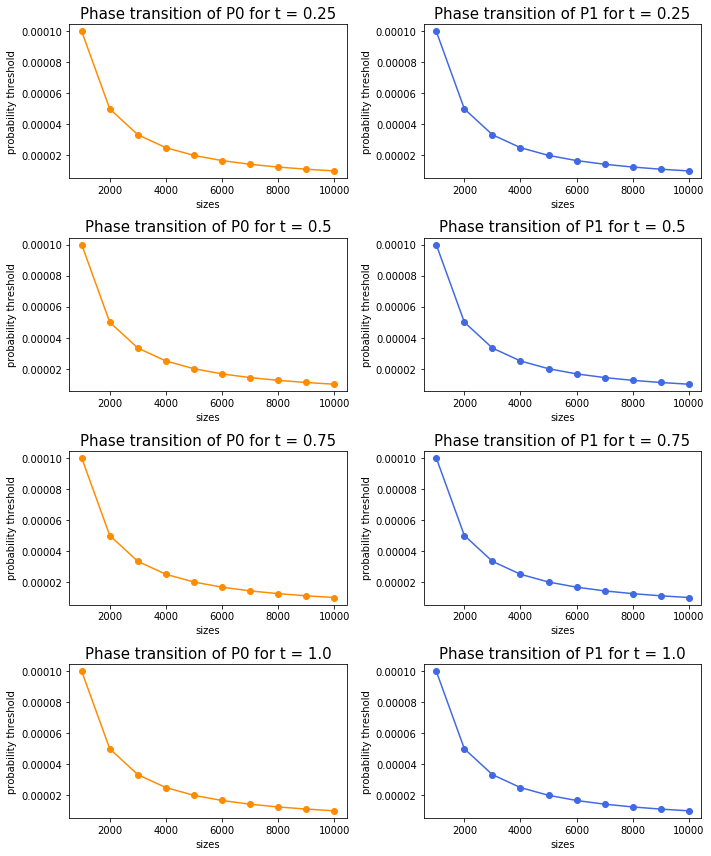

In [165]:
plot_threshold(False, list(range(10**3, 10**4 + 10**3, 10**3)), res, t)

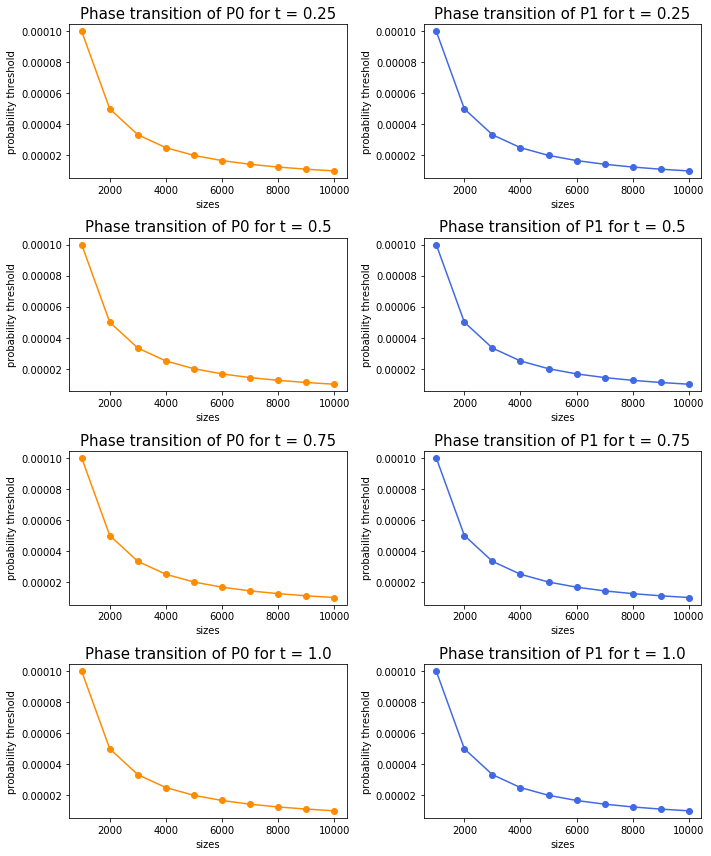

In [166]:
plot_threshold(True, list(range(10**3, 10**4 + 10**3, 10**3)), res, t)

In [169]:
def plot_threshold(directed, sizes, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    
    
    fig, axs = plt.subplots(len(res), 2, figsize = (10,12))
    for i, t in enumerate(res):
        data_0, data_1 = [], []
        for n in sizes:
            # reading probabilities
            with open('data/keys{}.txt'.format(n), 'r') as f:
                prob = eval(f.read())
            with open('data/keys_ref.txt'.format(n), 'r') as f:
                prob2 = eval(f.read())
            prob.extend(prob2)
            prob.sort()
            
            temp3_0,  temp3_1 = {}, {}
            for p in prob:
                if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
                    continue
                # load data
                temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
                # on each realization check for which nodes the property is realized
                temp2_0 = temp[temp.resistance == t].groupby('realization').apply(lambda x: x.max_level == 0)
                temp2_1 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level <= 1) & (x.avg_level < 0))
                temp3_0[p] = ((pd.DataFrame(temp2_0).groupby('realization').sum() > 0).mean()).values.item()
                temp3_1[p] = ((pd.DataFrame(temp2_1).groupby('realization').sum() > 0).mean()).values.item()
                del temp, temp2_0, temp2_1
            data_0.append(pd.Series(temp3_0).idxmin(0))
            data_1.append(pd.Series(temp3_1).idxmin(0))
            del temp3_0, temp3_1
        
        # plot data
        axs[i, 0].set_title('Phase transition of P0 for t = {}'.format(t), fontsize=15)
        _ = axs[i, 0].plot(sizes, data_0, 'o-', color='darkorange')
        _ = axs[i, 0].set_xlabel('sizes')
        _ = axs[i, 0].set_ylabel('probability threshold')
        axs[i, 1].set_title('Phase transition of P1 for t = {}'.format(t), fontsize=15)    
        _ = axs[i, 1].plot(sizes, data_1, 'o-', color='royalblue')
        _ = axs[i, 1].set_xlabel('sizes')
        _ = axs[i, 1].set_ylabel('probability threshold')
        
        # save data
        np.save('data/{}/p0-phase-trans-{}_idmin0.npy'.format(thr,t), data_0)
        np.save('data/{}/p1-phase-trans-{}_idmin0.npy'.format(thr,t), data_1)
        del data_0, data_1
        
    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/phase_thr_{}_{}_idmin0.jpeg'.format(thr, lab))

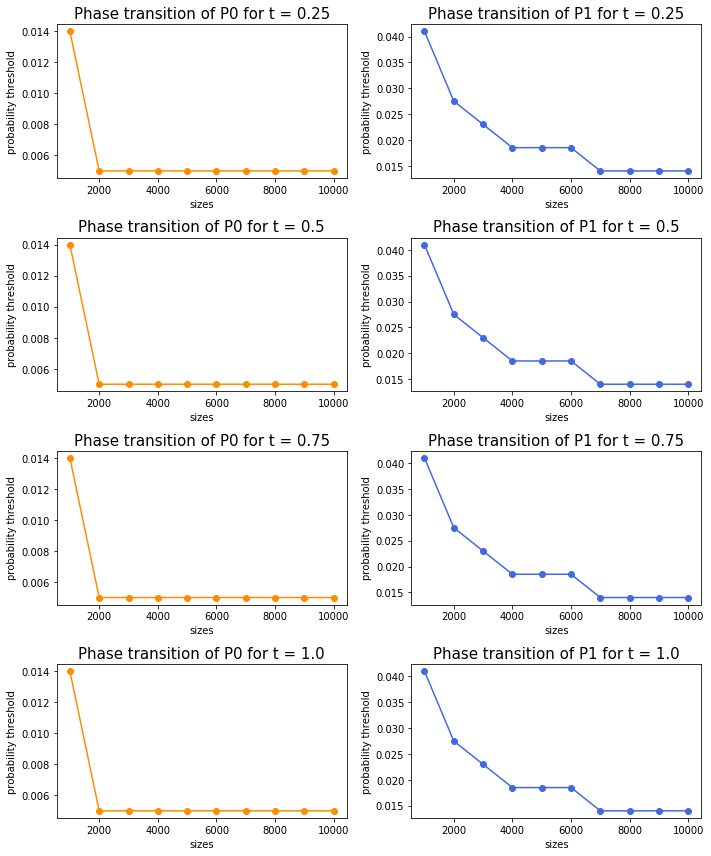

In [170]:
plot_threshold(False, list(range(10**3, 10**4 + 10**3, 10**3)), res, t)

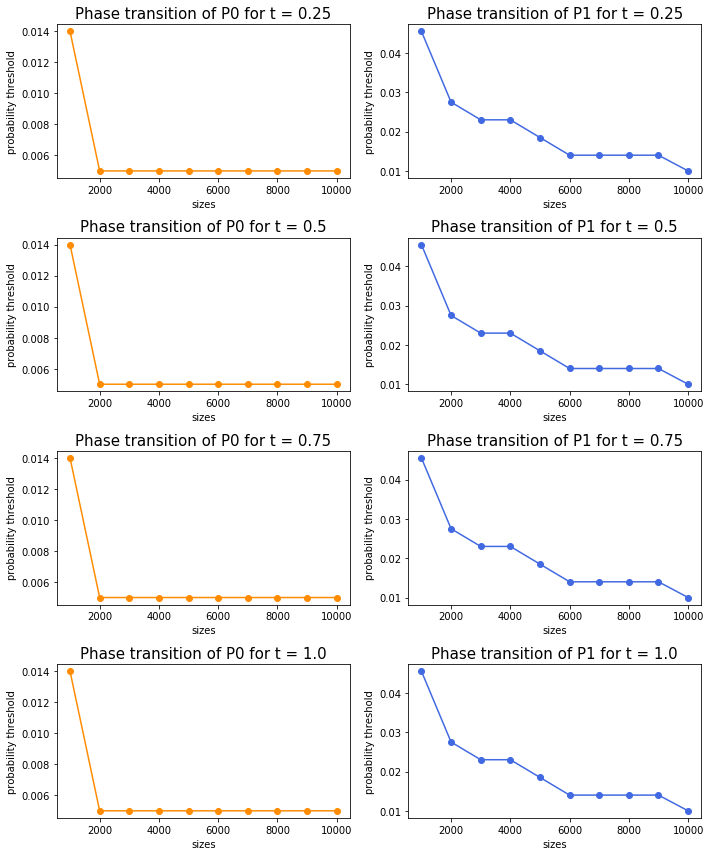

In [171]:
plot_threshold(True, list(range(10**3, 10**4 + 10**3, 10**3)), res, t)

In [155]:
lab = 'dir'
thr = 'maxpred'

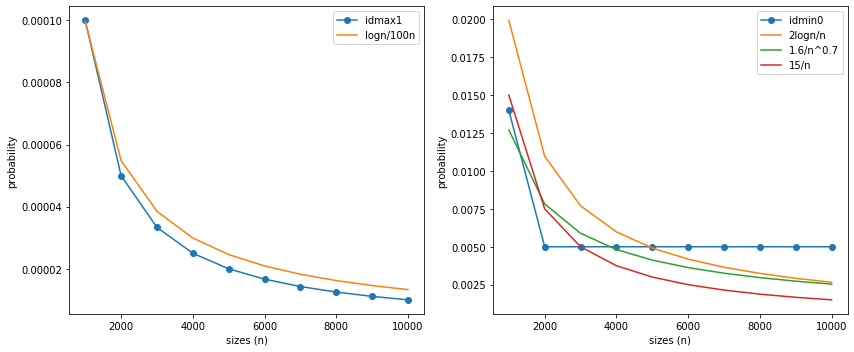

In [162]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))

sizes = np.arange(10**3, 10**4 + 10**3, 10**3)

data = np.load('data/maxpred/p0-phase-trans-0.5_idmax1.npy')
c = 0.01
axs[0].plot(sizes, data, '-o')
axs[0].plot(sizes, c * np.log2(sizes)/sizes)
axs[0].legend(['idmax1', 'logn/100n'])
axs[0].set_xlabel('sizes (n)')
axs[0].set_ylabel('probability')

data = np.load('data/maxpred/p0-phase-trans-0.5_idmin0.npy')
c1 = 2
c2 = 1.6
c3 = 15
axs[1].plot(sizes, data, '-o')
axs[1].plot(sizes, c1 * np.log2(sizes)/sizes)
axs[1].plot(sizes, c2 * 1/sizes**0.7)
axs[1].plot(sizes, c3 * 1/sizes)
axs[1].legend(['idmin0', '2logn/n', '1.6/n^0.7', '15/n'])
axs[1].set_xlabel('sizes (n)')
axs[1].set_ylabel('probability')

plt.tight_layout()
plt.savefig('images/p0_threshold_{}_{}.jpeg'.format(thr, lab))
plt.show()

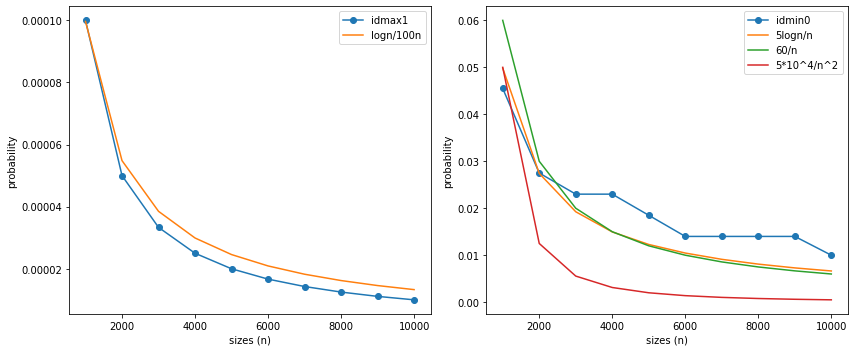

In [163]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))

sizes = np.arange(10**3, 10**4 + 10**3, 10**3)

data = np.load('data/maxpred/p1-phase-trans-0.5_idmax1.npy')
c = 0.01
axs[0].plot(sizes, data, '-o')
axs[0].plot(sizes, c * np.log2(sizes)/sizes)
axs[0].legend(['idmax1', 'logn/100n'])
axs[0].set_xlabel('sizes (n)')
axs[0].set_ylabel('probability')


data = np.load('data/maxpred/p1-phase-trans-0.5_idmin0.npy')
c1 = 5
c3 = 60
c4 = 50000
axs[1].plot(sizes, data, '-o')
axs[1].plot(sizes, c1 * np.log2(sizes)/sizes)
axs[1].plot(sizes, c3 * 1/sizes)
axs[1].plot(sizes, c4 * 1/sizes**2)
axs[1].legend(['idmin0', '5logn/n', '60/n', '5*10^4/n^2'])
axs[1].set_xlabel('sizes (n)')
axs[1].set_ylabel('probability')

plt.tight_layout()
plt.savefig('images/p1_threshold_{}_{}.jpeg'.format(thr, lab))
plt.show()